In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('abalone.data',header=None)
df.columns=['sex','length','diameter','height','whole_weight',
          'shucked_weight','viscera_weight','shell_weight','rings']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
whole_weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
shucked_weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
viscera_weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
shell_weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


array([[<AxesSubplot:xlabel='length', ylabel='length'>,
        <AxesSubplot:xlabel='diameter', ylabel='length'>,
        <AxesSubplot:xlabel='height', ylabel='length'>,
        <AxesSubplot:xlabel='whole_weight', ylabel='length'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='length'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='length'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='length'>,
        <AxesSubplot:xlabel='rings', ylabel='length'>],
       [<AxesSubplot:xlabel='length', ylabel='diameter'>,
        <AxesSubplot:xlabel='diameter', ylabel='diameter'>,
        <AxesSubplot:xlabel='height', ylabel='diameter'>,
        <AxesSubplot:xlabel='whole_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='rings', ylabel='diameter'>],
       [<AxesSubplot:xlabel=

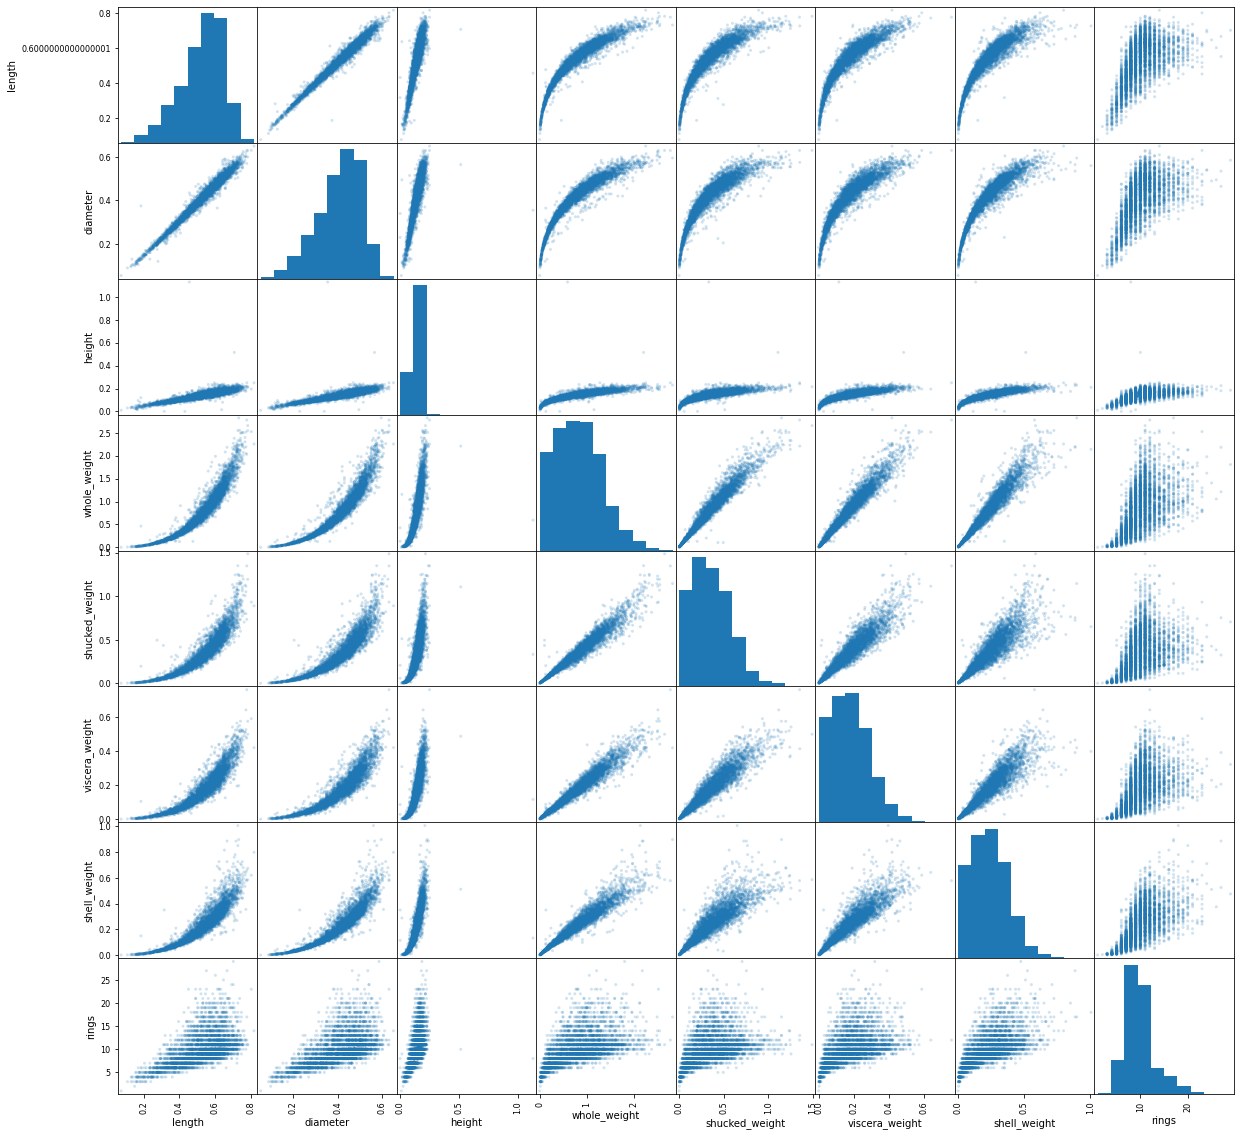

In [6]:
pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(20,20))

<AxesSubplot:>

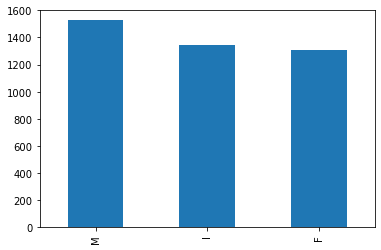

In [7]:
df.sex.value_counts().plot(kind='bar')

In [11]:
df = pd.get_dummies(df)
y = df['rings'].to_frame()
X = df.drop(columns='rings')
X

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=90)

In [13]:
results = OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:19:24   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
length            -0.4583      1.809     -0.